In [78]:
# SVM Classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing 

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score



In [79]:
df_test = pd.read_csv("SalaryData_Test(1).csv")
df_test 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [80]:
a = df_test['workclass'].value_counts()
print(a)


 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64


<AxesSubplot:>

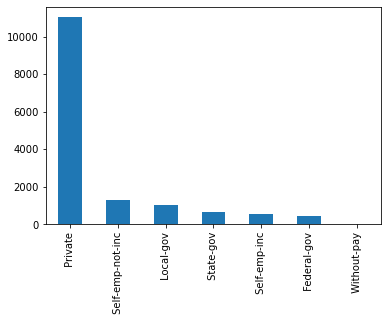

In [81]:
df_test['workclass'].value_counts().plot(kind='bar')

<AxesSubplot:>

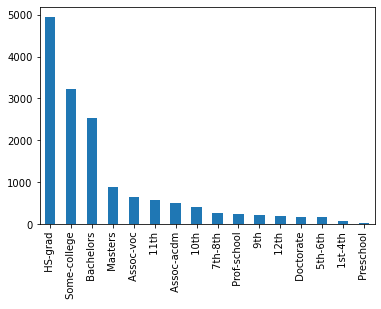

In [82]:
df_test['education'].value_counts().plot(kind='bar')

In [83]:
df_train= pd.read_csv("SalaryData_Train(1).csv")
df_train 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<AxesSubplot:>

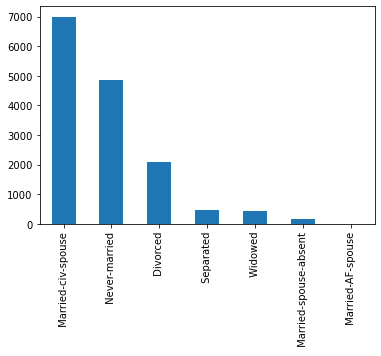

In [86]:
df_test['maritalstatus'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='occupation', ylabel='count'>

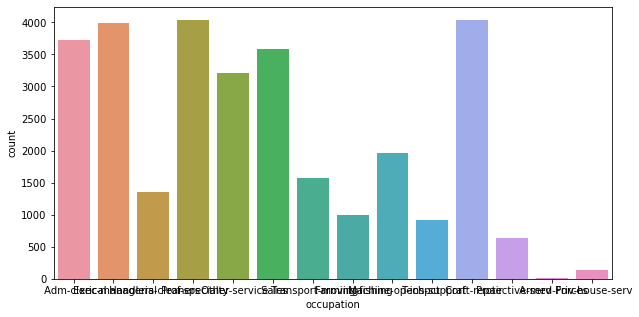

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(x='occupation', data=df_train)


In [66]:
label_encoder = preprocessing.LabelEncoder()
df_test['workclass']= label_encoder.fit_transform(df_test['workclass'])
df_test['education']= label_encoder.fit_transform(df_test['education'])
df_test['maritalstatus']= label_encoder.fit_transform(df_test['maritalstatus'])
df_test['occupation']= label_encoder.fit_transform(df_test['occupation'])
df_test['relationship']= label_encoder.fit_transform(df_test['relationship'])
df_test['race']= label_encoder.fit_transform(df_test['race'])
df_test['sex']= label_encoder.fit_transform(df_test['sex'])
df_test['native']= label_encoder.fit_transform(df_test['native'])
df_test['Salary']= label_encoder.fit_transform(df_test['Salary'])


In [67]:
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [68]:
label_encoder = preprocessing.LabelEncoder()
df_train['workclass']= label_encoder.fit_transform(df_train['workclass'])
df_train['education']= label_encoder.fit_transform(df_train['education'])
df_train['maritalstatus']= label_encoder.fit_transform(df_train['maritalstatus'])
df_train['occupation']= label_encoder.fit_transform(df_train['occupation'])
df_train['relationship']= label_encoder.fit_transform(df_train['relationship'])
df_train['race']= label_encoder.fit_transform(df_train['race'])
df_train['sex']= label_encoder.fit_transform(df_train['sex'])
df_train['native']= label_encoder.fit_transform(df_train['native'])
df_train['Salary']= label_encoder.fit_transform(df_train['Salary'])


In [69]:
df_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [70]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [71]:
df1 = norm_func(df_train.iloc[:,0:])
df1 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.948718,0.0
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.948718,0.0
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.948718,0.0
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.948718,0.0
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.102564,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.136986,0.333333,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.948718,0.0
30157,0.315068,0.333333,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718,1.0
30158,0.561644,0.333333,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.948718,0.0
30159,0.068493,0.333333,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,0.948718,0.0


In [72]:
df2 = norm_func(df_test.iloc[:,0:])
df2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.397959,0.948718,0.0
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718,0.0
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.397959,0.948718,1.0
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.50,1.0,0.076881,0.0,0.397959,0.948718,1.0
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.295918,0.948718,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.600000,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.397959,0.948718,0.0
15056,0.301370,0.333333,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.357143,0.948718,0.0
15057,0.287671,0.333333,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718,0.0
15058,0.369863,0.333333,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.397959,0.948718,0.0


In [73]:
x_train=df1.iloc[:,0:13]
y_train=df1.iloc[:,13]
x_test=df2.iloc[:,0:13]
y_test=df2.iloc[:,13]
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.948718
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.948718
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.948718
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.948718
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.102564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.136986,0.333333,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.948718
30157,0.315068,0.333333,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718
30158,0.561644,0.333333,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.948718
30159,0.068493,0.333333,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,0.948718


In [74]:
y_train

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
30156    0.0
30157    1.0
30158    0.0
30159    0.0
30160    1.0
Name: Salary, Length: 30161, dtype: float64

In [75]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((30161, 13), (30161,), (15060, 13), (15060,))

# Grid Search CV

In [76]:
#Kernel = poly
clf = SVC(kernel= "poly") 
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred) 

Accuracy = 84.35590969455511


array([[10626,   734],
       [ 1622,  2078]], dtype=int64)

In [15]:
#kernal = linear
clf = SVC(kernel= "linear") 


In [16]:
clf.fit(x_train , y_train)


SVC(kernel='linear')

In [17]:
y_pred = clf.predict(x_test)
   

In [18]:
acc = accuracy_score(y_test, y_pred) * 100 
 

In [19]:
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred) 

Accuracy = 80.98273572377158


array([[11003,   357],
       [ 2507,  1193]], dtype=int64)

In [20]:

clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred) 

Accuracy = 80.64409030544488


array([[10365,   995],
       [ 1920,  1780]], dtype=int64)

In [ ]:
#Kernal = RBF
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train) 

In [ ]:
#Poly model gives the accuracy